# Análise de base de dados de clientes

## Import de bibliotecas

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [111]:
clientes_raw = pd.read_csv('../Clientes.csv', sep=',')

In [112]:
clientes_raw.head()

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed,...,external_data_provider_fraud_score,lat_lon,marketing_channel,profile_phone_number,reported_income,shipping_state,shipping_zip_code,profile_tags,user_agent,target_fraud
0,343b7e7b-2cf8-e508-b8fd-0a0285af30aa,False,1Rk8w4Ucd5yR3KcqZzLdow==,IOVu8au3ISbo6+zmfnYwMg==,350.0,101.800832,0.259555,108.427273,0.40,25033.92,...,645,"(-29.151545708122246, -51.1386461804385)",Invite-email,514-9840782,57849.0,BR-MT,17528,"{'tags': ['n19', 'n8']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
1,bc2c7502-bbad-0f8c-39c3-94e881967124,False,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,370.0,97.062615,0.942655,92.002546,0.24,NaN,...,243,"(-19.687710705798963, -47.94151536525154)",Radio-commercial,251-3659293,4902.0,BR-RS,40933,"{'tags': ['n6', 'n7', 'nim']}",Mozilla/5.0 (Linux; Android 5.0.2; SAMSUNG SM-...,NaN
2,669630dd-2e6a-0396-84bf-455e5009c922,True,DGCQep2AE5QRkNCshIAlFQ==,Fv28Bz0YRTVAT5kl1bAV6g==,360.0,100.027073,0.351918,112.892453,0.29,7207.92,...,65,"(-28.748023890412284, -51.867279334353995)",Waiting-list,230-6097993,163679.0,BR-RR,50985,"{'tags': ['n0', 'n17', 'nim', 'da']}",Mozilla/5.0 (Linux; Android 6.0.1; SGP771 Buil...,NaN
3,d235609e-b6cb-0ccc-a329-d4f12e7ebdc1,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,510.0,101.599485,0.987673,94.902491,0.32,NaN,...,815,"(-17.520650158450454, -39.75801139933186)",Waiting-list,261-3543751,1086.0,BR-RN,37825,{'tags': ['n4']},Mozilla/5.0 (Linux; Android 6.0; HTC One X10 B...,NaN
4,9e0eb880-e8f4-3faa-67d8-f5cdd2b3932b,False,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,500.0,98.474289,0.532539,118.126207,0.18,NaN,...,320,"(-16.574259446978008, -39.90990074785962)",Invite-email,102-3660162,198618.0,BR-MT,52827,"{'tags': ['pro+aty', 'n19', 'da', 'b19']}",Mozilla/5.0 (Linux; Android 7.0; Pixel C Build...,NaN


In [113]:
clientes_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               45000 non-null  object 
 1   target_default                                    41741 non-null  object 
 2   score_1                                           44438 non-null  object 
 3   score_2                                           44438 non-null  object 
 4   score_3                                           44438 non-null  float64
 5   score_4                                           45000 non-null  float64
 6   score_5                                           45000 non-null  float64
 7   score_6                                           45000 non-null  float64
 8   risk_rate                                         44438 non-null  float64
 9   last_amount_borro

<AxesSubplot:xlabel='target_default', ylabel='count'>

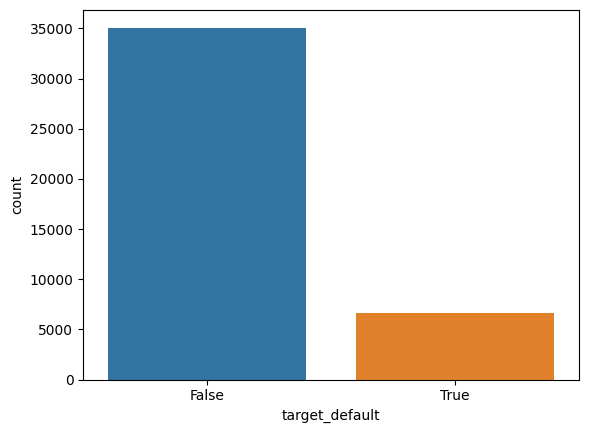

In [114]:
sn.countplot(x='target_default', data=clientes_raw)

### A base de dados está desbalanceada com relação ao target.
### Para diminuir as chances de ter uma análise com viés, vamos separar registros com base na ocorrência de target_default == True.

In [115]:
### Separar classe minoritária e maioritária
df_minor  = clientes_raw[clientes_raw['target_default']==True]
df_maior = clientes_raw[clientes_raw['target_default']==False]

In [116]:
### Selecionar uma amostra da classe maioritária com base no tamanho da classe minoritária
df_maior = df_maior.sample(len(df_minor), random_state=0)

In [117]:
### concatenar as classes maioritária e minoritária
clientes_sample = pd.concat([df_maior,df_minor])

In [118]:

## embaralhar a amostra
clientes_sample = clientes_sample.sample(frac=1, random_state=0)

<AxesSubplot:xlabel='target_default', ylabel='count'>

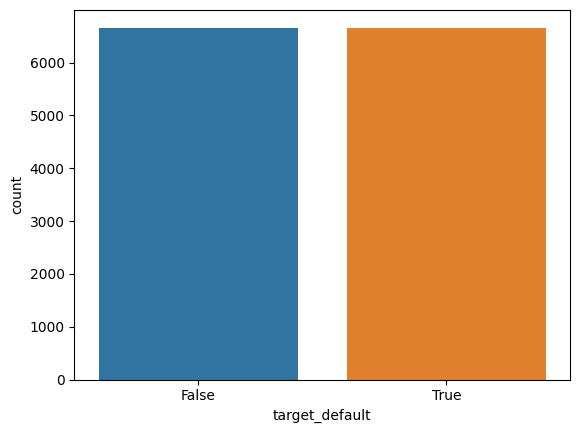

In [119]:
### Verificar se a base está balanceada
sn.countplot(x='target_default', data=clientes_sample)

In [120]:
clientes_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13322 entries, 27863 to 3544
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   ids                                               13322 non-null  object 
 1   target_default                                    13322 non-null  object 
 2   score_1                                           13322 non-null  object 
 3   score_2                                           13322 non-null  object 
 4   score_3                                           13322 non-null  float64
 5   score_4                                           13322 non-null  float64
 6   score_5                                           13322 non-null  float64
 7   score_6                                           13322 non-null  float64
 8   risk_rate                                         13322 non-null  float64
 9   last_amount_bo

### Temos 13322 registros e 43 features. Agora vamos avaliar quais são as features qua manteremos na análise.

In [121]:
clientes_sample.columns

Index(['ids', 'target_default', 'score_1', 'score_2', 'score_3', 'score_4',
       'score_5', 'score_6', 'risk_rate', 'last_amount_borrowed',
       'last_borrowed_in_months', 'credit_limit', 'reason', 'income',
       'facebook_profile', 'state', 'zip', 'channel', 'job_name', 'real_state',
       'ok_since', 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts',
       'n_issues', 'application_time_applied', 'application_time_in_funnel',
       'email', 'external_data_provider_credit_checks_last_2_year',
       'external_data_provider_credit_checks_last_month',
       'external_data_provider_credit_checks_last_year',
       'external_data_provider_email_seen_before',
       'external_data_provider_first_name',
       'external_data_provider_fraud_score', 'lat_lon', 'marketing_channel',
       'profile_phone_number', 'reported_income', 'shipping_state',
       'shipping_zip_code', 'profile_tags', 'user_agent', 'target_fraud'],
      dtype='object')

In [122]:
clientes_sample.iloc[:10, :10]

,ids,target_default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,last_amount_borrowed
27863,a972158b-94e7-6f05-045c-68c2bc618d30,False,e4NYDor1NOw6XKGE60AWFw==,NLvAOzzmJba/0zolQnWF5Q==,230.0,101.143302,0.397624,109.417002,0.23,NaN
25598,9f4c41b0-fd50-3ba1-7c3b-20d7b925614f,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,260.0,102.235814,0.109901,111.099544,0.32,10512.46
13507,8436f68d-1459-2c92-797c-aba8bdbc7c5e,True,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,240.0,105.656023,0.715078,112.104440,0.27,NaN
12779,e0b0e32e-11b8-4c3e-8bc9-92ace314d5af,True,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,320.0,95.243734,0.578123,109.398715,0.19,NaN
42633,ad31df97-c446-b022-89eb-61f1b2e5d02a,True,1Rk8w4Ucd5yR3KcqZzLdow==,/tdlnWjXoZ3OjdtBXzdOJQ==,420.0,96.151504,0.602146,115.302430,0.34,NaN
29271,86e4d2a3-fcf7-ce46-643c-d568815494f8,True,fyrlulOiZ+5hoFqLa6UbDQ==,wjdj2vxjWoDsEIk0l09ynw==,440.0,100.526551,0.465210,98.337710,0.59,16032.76
8958,df21cfe9-5711-1761-eb55-2c424add91c3,False,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,430.0,99.621390,0.622682,88.965551,0.35,30039.34
29660,669b55d3-049c-be24-a511-e035e3137e48,True,8k8UDR4Yx0qasAjkGrUZLw==,+CxEO4w7jv3QPI/BQbyqAA==,440.0,100.577872,0.467189,106.248155,0.28,NaN
1554,f2c5a75e-ec13-d7d5-0407-acec9fa9a07e,False,1Rk8w4Ucd5yR3KcqZzLdow==,/tdlnWjXoZ3OjdtBXzdOJQ==,510.0,97.470014,0.701920,95.316547,0.32,8029.32
6099,ab58b84c-28d2-af86-b644-b4fac865302a,True,DGCQep2AE5QRkNCshIAlFQ==,SaamrHMo23l/3TwXOWgVzw==,430.0,92.878790,0.523845,82.585631,0.25,25023.97


In [125]:
clientes_sample.iloc[:10, 10:15]

,last_borrowed_in_months,credit_limit,reason,income,facebook_profile
27863,NaN,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,54168.07,False
25598,36.0,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,33028.20,True
13507,NaN,0.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,40016.97,False
12779,NaN,26075.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,86009.80,NaN
42633,NaN,20945.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,42038.41,True
29271,60.0,64517.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,84023.79,NaN
8958,60.0,102786.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,94007.18,True
29660,NaN,91300.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,62835.11,False
1554,36.0,52246.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,47009.86,True
6099,60.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,45016.24,True


In [127]:
clientes_sample.iloc[:10, 15:20]

,state,zip,channel,job_name,real_state
27863,bNDXnbe7XAx/VUe+cbjDiw==,XjbxVy9K4ASj0GCQFUOZHQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==
25598,1DpYl6dtzY0qE33poow3iw==,At+tZHbp9UVvvzPcIZNRrA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGPeS...,N5/CE7lSkAfB04hVFFwllw==
13507,xsd3ZdsI3356I3xMxZeiqQ==,t6wxMZ6eHJp+HUfkHuN+rA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==
12779,/+QaZYcpPt5mXLpkv6I8Bw==,cy2GQZhD2TA3Y16zzrX4qQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==
42633,xsd3ZdsI3356I3xMxZeiqQ==,RqGJ/uzOqcR/qObdcZqsFg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==
29271,qItmSqWrjm+MopDA+UpKRw==,pP2Eu221AcsIrI6c9DkMRg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==
8958,GW2VZ3dN3OGHSjQ6JkfqQw==,gupRYCEwfV8MlD+HhQ9c3w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==
29660,VafbDA6D5W2TpGMAUJbW8Q==,YoDhXGId/nnmdaO5CE40FQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==
1554,sjJbkqJS7cXalHLBFA+EOQ==,L4CoyKAcrcgIPrgVRJ9fAg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==
6099,/EoxQEzy1PWWTtv6DNwr2w==,FIHlUczFmo6ANhTsAEYFtg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==


In [126]:
clientes_sample.iloc[:10, 20:25]

,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
27863,NaN,0.0,0.0,4.0,NaN
25598,6.0,0.0,0.0,6.0,6.0
13507,NaN,1.0,0.0,4.0,4.0
12779,NaN,0.0,0.0,13.0,13.0
42633,64.0,0.0,0.0,14.0,14.0
29271,12.0,0.0,0.0,7.0,7.0
8958,79.0,0.0,0.0,11.0,11.0
29660,NaN,0.0,0.0,23.0,23.0
1554,NaN,0.0,0.0,14.0,14.0
6099,NaN,0.0,0.0,11.0,NaN


### Existem dados que estão criptografados e dados muito particulares. Vamos limpar essas informações para ficar com um dataframe mais conciso de acordo com o objetivo da análise.

In [123]:
col_index = zip(clientes_sample.columns, range(43))
col_index

In [124]:
for i, v in col_index:
    print(f"{i}: {v}")

ids: 0
target_default: 1
score_1: 2
score_2: 3
score_3: 4
score_4: 5
score_5: 6
score_6: 7
risk_rate: 8
last_amount_borrowed: 9
last_borrowed_in_months: 10
credit_limit: 11
reason: 12
income: 13
facebook_profile: 14
state: 15
zip: 16
channel: 17
job_name: 18
real_state: 19
ok_since: 20
n_bankruptcies: 21
n_defaulted_loans: 22
n_accounts: 23
n_issues: 24
application_time_applied: 25
application_time_in_funnel: 26
email: 27
external_data_provider_credit_checks_last_2_year: 28
external_data_provider_credit_checks_last_month: 29
external_data_provider_credit_checks_last_year: 30
external_data_provider_email_seen_before: 31
external_data_provider_first_name: 32
external_data_provider_fraud_score: 33
lat_lon: 34
marketing_channel: 35
profile_phone_number: 36
reported_income: 37
shipping_state: 38
shipping_zip_code: 39
profile_tags: 40
user_agent: 41
target_fraud: 42
